# Лабораторная работа №4. Деревья решений.
## Выполнил Коршиков Владислав Игоревич, группа 6133-010402D

In [236]:
# Подключаемся к Google Диск
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [237]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline


from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report

import warnings
import sys  
if not sys.warnoptions:
    warnings.simplefilter("ignore")

Для данной лабораторной работы использовался DataFrame, содержащий все машины из Gran Turismo 6: https://www.kaggle.com/prasertk/gran-turismo-6-cars/version/1

Категориальные: car_type, drive

Числовые: price, hp, weight, torque

In [238]:
# Загрузим датафрейм и удалим строчки с пустующими значениями
gran_turismo_a = pd.read_csv("/content/drive/MyDrive/gran_turismo_gt6.csv") 
gran_turismo_2=gran_turismo_a
gran_turismo=gran_turismo_2.dropna(axis=0)
gran_turismo.isnull().sum()

brand       0
model       0
car_type    0
img_url     0
price       0
drive       0
hp          0
weight      0
torque      0
w_kg        0
dtype: int64

In [239]:
gran_turismo

,brand,model,car_type,img_url,price,drive,hp,weight,torque,w_kg
0,AC Cars,427 S/C '66,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,423200.0,FR,478.0,1311.0,651.0,272 to ? W/Kg
1,AEM,S2000,Tuned,https://www.kudosprime.com/gt6/images/cars/gt6...,100000.0,FR,430.0,1155.0,495.0,278 to 345 W/Kg
3,Abarth,500 '09,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,29500.0,FF,133.0,1035.0,180.0,96 to 251 W/Kg
4,Abarth,Grande Punto '09,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,27000.0,FF,153.0,1240.0,230.0,92 to ? W/Kg
5,Acura,CL 3.2 Type-S '01,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,32180.0,FF,260.0,1592.0,315.0,122 to ? W/Kg
...,...,...,...,...,...,...,...,...,...,...
1265,Volkswagen,Scirocco R '10,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,51500.0,FF,252.0,1410.0,330.0,133 to 298 W/Kg
1266,Volkswagen,W12 Nardo '01,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,1250000.0,MR,574.0,1300.0,620.0,329 to ? W/Kg
1267,Volvo,240 GLT Estate '88,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,15920.0,FR,127.0,1890.0,190.0,50 to ? W/Kg
1268,Volvo,C30 R-Design '09,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,42000.0,FF,227.0,1430.0,319.0,118 to ? W/Kg


In [240]:
#Уберём столбцы, которые не оказывают влияние на целевое значение, чтобы с датафреймом было проще работать
# Также, нам необходимо заменить tuned на street в car_type, так как tuned является подклассом race, но это выделение нигде не используется
gran_turismo.pop('w_kg')
gran_turismo.pop('model')
gran_turismo.pop('img_url')
gran_turismo['car_type'] = np.where((gran_turismo.car_type == 'Tuned'), 'Race', gran_turismo.car_type)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1. На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy

In [241]:

#Разобьём датасет на тестовую и тренировочную датафреймы
gran_turismo_3 = gran_turismo.copy()
gran_turismo_3.pop('brand')


gran_turismo_3 = gran_turismo_3[gran_turismo_3.drive != 'RR']


# 1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью pd.factorize / pd.get_dummies

In [242]:
gran_turismo_3.car_type, unique=  pd.factorize(gran_turismo_3.car_type)
print(gran_turismo_3.car_type)
print(unique)




0       0
1       1
3       0
4       0
5       0
       ..
1265    0
1266    0
1267    0
1268    0
1269    0
Name: car_type, Length: 1013, dtype: int64
Index(['Street', 'Race'], dtype='object')


In [243]:
gran_turismo_3

,car_type,price,drive,hp,weight,torque
0,0,423200.0,FR,478.0,1311.0,651.0
1,1,100000.0,FR,430.0,1155.0,495.0
3,0,29500.0,FF,133.0,1035.0,180.0
4,0,27000.0,FF,153.0,1240.0,230.0
5,0,32180.0,FF,260.0,1592.0,315.0
...,...,...,...,...,...,...
1265,0,51500.0,FF,252.0,1410.0,330.0
1266,0,1250000.0,MR,574.0,1300.0,620.0
1267,0,15920.0,FR,127.0,1890.0,190.0
1268,0,42000.0,FF,227.0,1430.0,319.0


# 1.1.  С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета KNeighborsClassifier (без использования конвееров)

In [244]:
y=  gran_turismo_3.drive
print(y)
X=gran_turismo_3.drop("drive", axis=1)
X.head()

0       FR
1       FR
3       FF
4       FF
5       FF
        ..
1265    FF
1266    MR
1267    FR
1268    FF
1269    FF
Name: drive, Length: 1013, dtype: object


,car_type,price,hp,weight,torque
0,0,423200.0,478.0,1311.0,651.0
1,1,100000.0,430.0,1155.0,495.0
3,0,29500.0,133.0,1035.0,180.0
4,0,27000.0,153.0,1240.0,230.0
5,0,32180.0,260.0,1592.0,315.0


In [245]:
Scaler = MinMaxScaler()
X_scaler = Scaler.fit_transform(X)

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=12)



KNN_model = KNeighborsClassifier(n_neighbors=7)

KNN_model.fit(X_train, y_train)

KNN_prediction = KNN_model.predict(X_test)

print(classification_report(y_test, KNN_prediction))
print(accuracy_score(y_test, KNN_prediction) * 100)

              precision    recall  f1-score   support

         4WD       0.48      0.52      0.50        52
          FF       0.67      0.55      0.61        56
          FR       0.54      0.70      0.61       105
          MR       0.72      0.32      0.44        41

    accuracy                           0.57       254
   macro avg       0.61      0.52      0.54       254
weighted avg       0.59      0.57      0.56       254

56.69291338582677


# 1.2. То же самое и использованием sklearn.pipeline.Pipeline

In [247]:
KNeighborsPipe = Pipeline([('Scaler', MinMaxScaler()), ('kNN', KNeighborsClassifier())])
KNeighborsPipe.fit(X_train, y_train)
KNeighborsPredictPipe = KNeighborsPipe.predict(X_test)
print(classification_report(y_test, KNeighborsPredictPipe))
print(accuracy_score(y_test, KNeighborsPredictPipe) * 100)

              precision    recall  f1-score   support

         4WD       0.48      0.60      0.53        52
          FF       0.59      0.68      0.63        56
          FR       0.64      0.61      0.62       105
          MR       0.81      0.51      0.63        41

    accuracy                           0.61       254
   macro avg       0.63      0.60      0.60       254
weighted avg       0.63      0.61      0.61       254

60.629921259842526


# 1.3. С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели

In [248]:
KNeighborsParams = {'n_neighbors': range(1, 30)}
KNeighborsGCV = GridSearchCV(KNeighborsClassifier(), KNeighborsParams)
KNeighborsGCV.fit(X_train, y_train)
KNeighborsPredictGCV = KNeighborsGCV.predict(X_test)
print(classification_report(y_test, KNeighborsPredictGCV))
print(accuracy_score(y_test, KNeighborsPredictGCV) * 100)

              precision    recall  f1-score   support

         4WD       0.54      0.60      0.57        52
          FF       0.71      0.62      0.67        56
          FR       0.63      0.65      0.64       105
          MR       0.55      0.54      0.54        41

    accuracy                           0.61       254
   macro avg       0.61      0.60      0.60       254
weighted avg       0.62      0.61      0.62       254

61.417322834645674


In [249]:
KNeighborsGCV.best_estimator_

KNeighborsClassifier(n_neighbors=1)

# 2.1. Продемонстрировать работу DecisionTreeClassifier, посчитать метрики качества на отложенной выборке

In [250]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTCPredict = DTC.predict(X_test)
print(classification_report(y_test, DTCPredict))
print(accuracy_score(y_test, DTCPredict) * 100)

              precision    recall  f1-score   support

         4WD       0.70      0.67      0.69        52
          FF       0.74      0.75      0.74        56
          FR       0.74      0.77      0.76       105
          MR       0.76      0.71      0.73        41

    accuracy                           0.74       254
   macro avg       0.74      0.73      0.73       254
weighted avg       0.74      0.74      0.74       254

73.62204724409449


# 2.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиска наилучшего дерева (перебрать max_depth, max_features и может быть что-то ещё)

In [251]:
parametrs = {
    "max_depth": np.linspace(1, 32, 32, endpoint=True),
    "min_samples_split": np.linspace(0.01, 0.1, 10, endpoint=True),
    "min_samples_leaf": np.linspace(0.01, 0.1, 10, endpoint=True),
}

DTC_GCV = GridSearchCV(DecisionTreeClassifier(), parametrs)
DTC_GCV.fit(X_train, y_train)
print(DTC_GCV.best_estimator_)
DTC_GCV_Predict = DTC_GCV.predict(X_test)
print(classification_report(y_test, DTC_GCV_Predict))
print(accuracy_score(y_test, DTC_GCV_Predict) * 100)

DecisionTreeClassifier(max_depth=14.0, min_samples_leaf=0.01,
                       min_samples_split=0.01)
              precision    recall  f1-score   support

         4WD       0.51      0.54      0.52        52
          FF       0.70      0.80      0.75        56
          FR       0.66      0.66      0.66       105
          MR       0.77      0.56      0.65        41

    accuracy                           0.65       254
   macro avg       0.66      0.64      0.64       254
weighted avg       0.65      0.65      0.65       254

64.96062992125984


# 2.3. Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности

  feature  importance
2      hp    0.381651
1   price    0.320758
3  weight    0.161425


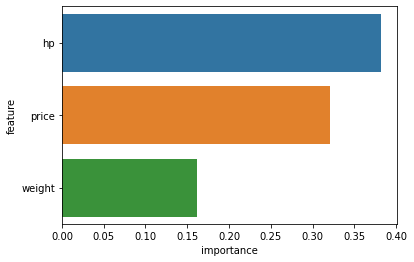

In [252]:
feature_importance = pd.DataFrame(data={"feature": X_train.columns, 'importance': DTC_GCV.best_estimator_.feature_importances_})
important = feature_importance.sort_values(by="importance", ascending=False).head(3)
print(important)
sns.barplot(data=important[important['importance'] > 0], y="feature", x="importance")

##Итак, у нас есть три наиболее важных признака: hp, price и weight

# 3.1. Продемонстрировать работу случайного леса RandomForestClassifier

In [253]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_Predict = RF.predict(X_test)
print(classification_report(y_test, RF_Predict))
print(accuracy_score(y_test, RF_Predict) * 100)

              precision    recall  f1-score   support

         4WD       0.79      0.73      0.76        52
          FF       0.78      0.82      0.80        56
          FR       0.77      0.84      0.80       105
          MR       0.94      0.73      0.82        41

    accuracy                           0.80       254
   macro avg       0.82      0.78      0.80       254
weighted avg       0.80      0.80      0.80       254

79.52755905511812


# 3.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики

In [254]:
parametrs = {"n_estimators": range(1, 65)}

RF_GCV = GridSearchCV(RandomForestClassifier(), parametrs)
RF_GCV.fit(X_train, y_train)
print(RF_GCV.best_estimator_)

RF_GCV_Predict = RF_GCV.predict(X_test)
print(classification_report(y_test, RF_GCV_Predict))
print(accuracy_score(y_test, RF_GCV_Predict) * 100)

RandomForestClassifier(n_estimators=37)
              precision    recall  f1-score   support

         4WD       0.84      0.71      0.77        52
          FF       0.76      0.84      0.80        56
          FR       0.75      0.82      0.78       105
          MR       0.85      0.68      0.76        41

    accuracy                           0.78       254
   macro avg       0.80      0.76      0.78       254
weighted avg       0.79      0.78      0.78       254

77.95275590551181


#Наибольшей точности удалось добиться, используя RandomForestClassifier.